In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import sem

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Files
mouse_filename = "data/mouse_drug_data.csv"
clinical_filename = "data/clinicaltrial_data.csv"

# Read Files
mouse_df = pd.read_csv(mouse_filename)
clinical_df = pd.read_csv(clinical_filename)

# Merge Files
dataframe = pd.merge(mouse_df, clinical_df, on= "Mouse ID")

dataframe.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
## TUMOR RESPONSE TO TREATMENT ##
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_groupby = dataframe.groupby(["Drug", "Timepoint"])
tumor_mean = drug_time_groupby["Tumor Volume (mm3)"].mean()
tumor_mean_df = pd.DataFrame(tumor_mean).reset_index()
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = drug_time_groupby["Tumor Volume (mm3)"].sem()
tumor_se_df = pd.DataFrame(tumor_se).reset_index()
tumor_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot_df = tumor_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_mean_pivot_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
tumor_se_pivot_df = tumor_se_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_se_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


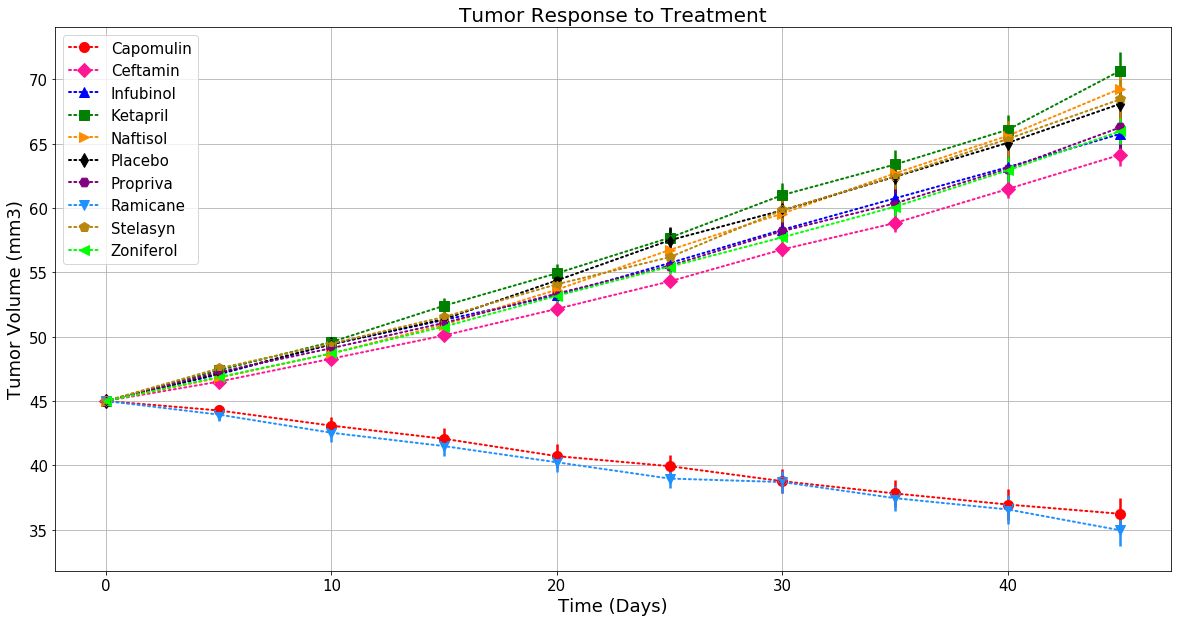

In [8]:
# Generate the Plot (with Error Bars)
drugname = tumor_mean_pivot_df.keys()

marker = ["o","D","^","s",">","d","H","v","p","<"]
colour = ["red", "deeppink","blue","green", "darkorange", "black","purple", "dodgerblue", "darkgoldenrod", "lime"]

markers = dict(zip(drugname, marker))
colours = dict(zip(drugname, colour))

legend = {}
fig, ax = plt.subplots(figsize=(20, 10))   
for x in drugname:
    legend[x], = plt.plot(tumor_mean_pivot_df.index, tumor_mean_pivot_df[x], marker = markers[x], alpha = 3, 
                          linestyle = ":", color = colours[x],dash_capstyle = "round", linewidth = 2, markersize = 10)
    ax.errorbar(tumor_mean_pivot_df.index, tumor_mean_pivot_df[x], yerr=tumor_se_pivot_df[x], fmt=markers[x], 
                color = colours[x],linewidth = 2.5)

plt.legend(handles= legend.values(), loc="best",prop={'size': 15})

plt.xlabel("Time (Days)", size = 18)
plt.ylabel("Tumor Volume (mm3)", size = 18)
plt.title("Tumor Response to Treatment", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
    
plt.grid()

# Save the Figure
plt.savefig("images/TumorResponsetoTreatment.png")

plt.show()

In [9]:
## METASTATIC RESPONSE TO TREATMENT
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = drug_time_groupby["Metastatic Sites"].mean()
metastatic_mean_df = pd.DataFrame(metastatic_mean)
metastatic_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_se = drug_time_groupby["Metastatic Sites"].sem()
metastatic_se_df = pd.DataFrame(metastatic_se)
metastatic_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_df = metastatic_mean_df.reset_index()
metastatic_mean_pivot_df = metastatic_mean_df.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

metastatic_mean_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
metastatic_se_df = metastatic_se_df.reset_index()
metastatic_se_pivot_df = metastatic_se_df.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

metastatic_se_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


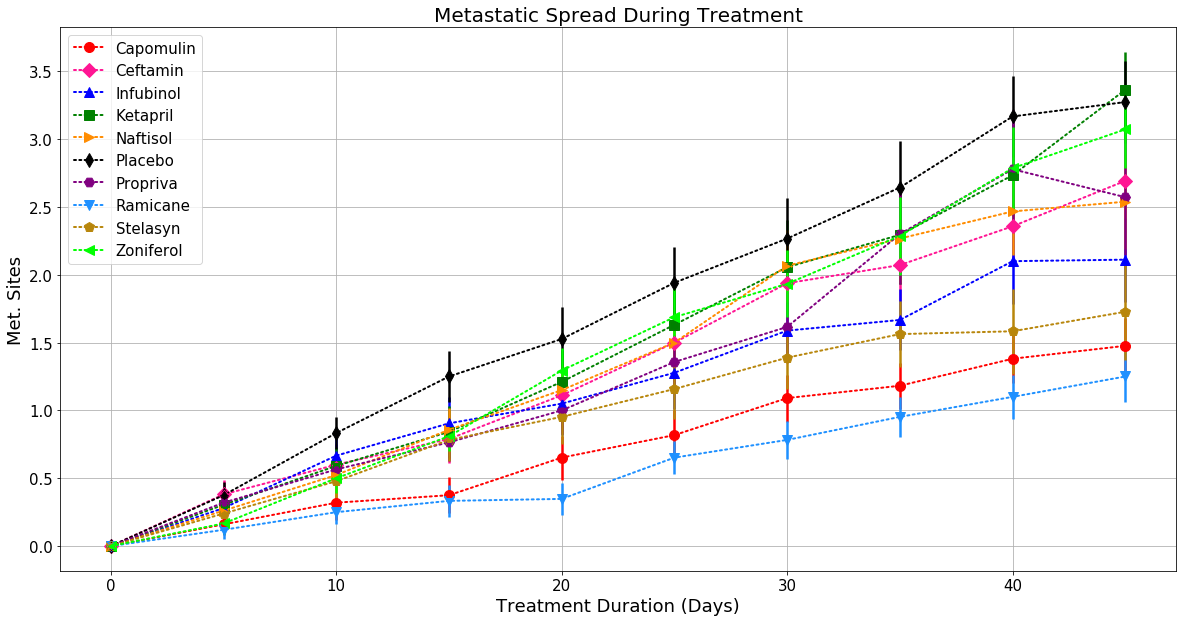

In [13]:
# Generate the Plot (with Error Bars)
metastatic_legend = {}
fig, ax = plt.subplots(figsize=(20, 10))   
for x in drugname:
    metastatic_legend[x], = plt.plot(metastatic_mean_pivot_df.index, metastatic_mean_pivot_df[x], marker = markers[x], alpha = 3, 
                          linestyle = ":", color = colours[x],dash_capstyle = "round", linewidth = 2, markersize = 10)
    ax.errorbar(metastatic_mean_pivot_df.index, metastatic_mean_pivot_df[x], yerr=metastatic_se_pivot_df[x], fmt=markers[x], 
                color = colours[x],linewidth = 2.5)

plt.legend(handles= metastatic_legend.values(), loc="best",prop={'size': 15})

plt.xlabel("Treatment Duration (Days)", size = 18)
plt.ylabel("Met. Sites", size = 18)
plt.title("Metastatic Spread During Treatment", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
    
plt.grid()

# Save the Figure
plt.savefig("images/MetastaticSpreadDuringTreatment.png")

plt.show()

In [14]:
## SURVIVAL RATES
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = drug_time_groupby["Mouse ID"].count()
survival_count_df = pd.DataFrame(survival_count).reset_index()

survival_count_df = survival_count_df.rename(columns={"Mouse ID":"Mouse Count"})
survival_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
survival_count_pivot_df = survival_count_df.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")
survival_count_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


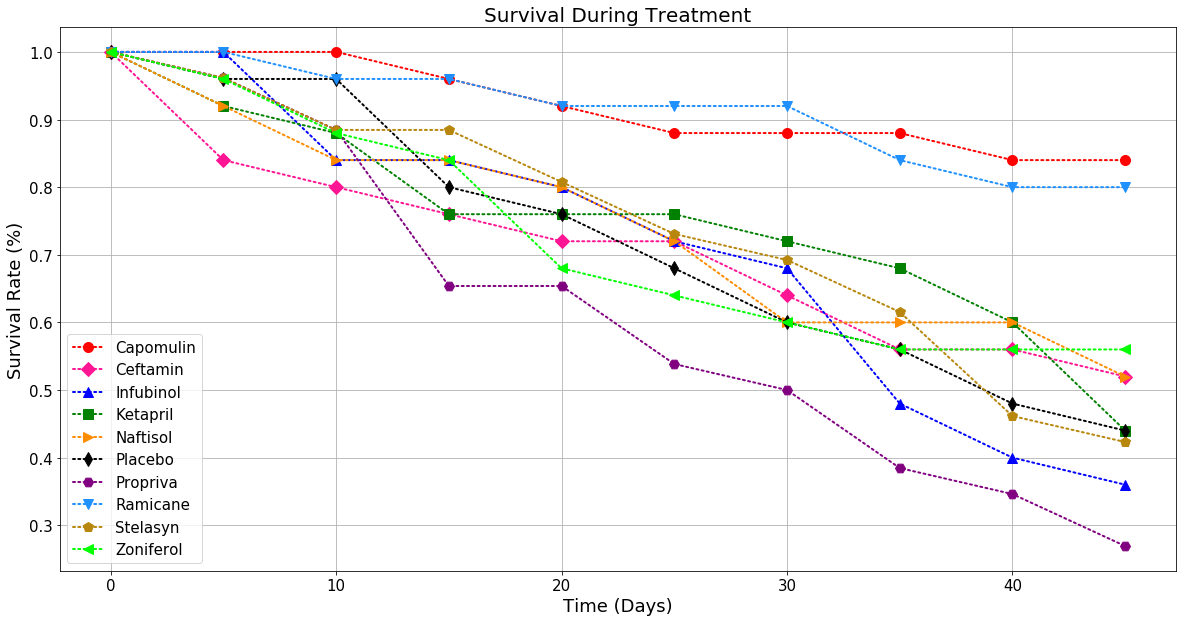

In [16]:
# Generate the Plot (Accounting for percentages)
survival_legend = {}

plt.figure(figsize=(20,10))
for x in drugname: 
    total_mice = survival_count_pivot_df[x][0]
    survival_percent = survival_count_pivot_df[x]/total_mice
    survival_legend[x], = plt.plot(survival_count_pivot_df.index, survival_percent, marker = markers[x], alpha = 3, 
                          linestyle = ":", color = colours[x],dash_capstyle = "round", linewidth = 2, 
                          markersize = 10)
plt.legend(handles= survival_legend.values(), loc="best",prop={'size': 15})

plt.xlabel("Time (Days)", size = 18)
plt.ylabel("Survival Rate (%)", size = 18)
plt.title("Survival During Treatment", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

# Save the Figure
plt.savefig("images/SurvivalDuringTreatment.png")

plt.show()

In [17]:
## Summary Bar Graph
# Calculate the percent changes for each drug
tumor_percent_change = {}
time_max = max(tumor_mean_pivot_df.index)
for x in drugname:
    final_tumor_vol = tumor_mean_pivot_df[x][time_max]
    start_tumor_vol = tumor_mean_pivot_df[x][0]
    percent_change = (final_tumor_vol - start_tumor_vol)/start_tumor_vol*100
    tumor_percent_change[x] = percent_change
tumor_percent_change_df = pd.Series(tumor_percent_change)
tumor_percent_change_df.index.name = "Drug"
tumor_percent_change_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

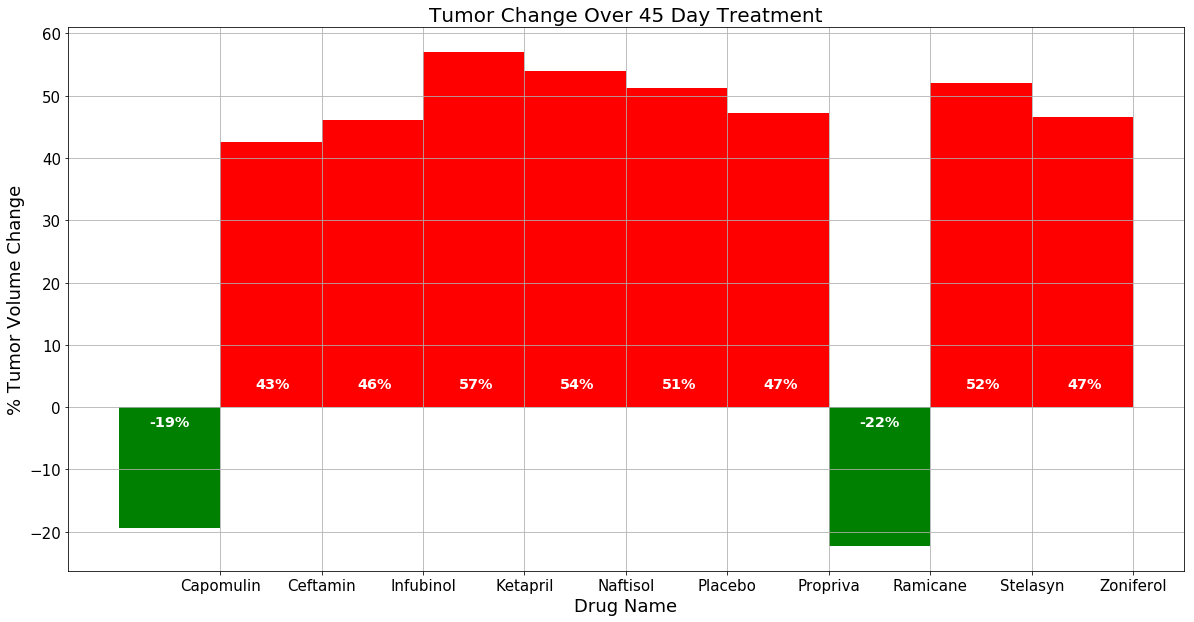

In [18]:
counter = -0.65
plt.figure(figsize=(20,10))
for x in drugname:  
    if tumor_percent_change_df[x]> 0:
        bar_color = "red"
        text_position = 3  
        text_position_x = 0
    else:
        bar_color = "green"
        text_position = -3
        text_position_x = 0.05
        
    plt.bar(x, tumor_percent_change_df[x], width = -1, color = bar_color, align = "edge", label = tumor_percent_change[x])
    plt.text(counter - text_position_x, text_position, '{:.0f}%'.format(tumor_percent_change_df[x]), color = "white", fontweight = "bold", fontsize = "x-large")
    counter = counter + 1 
    
plt.xlabel("Drug Name", size = 18)
plt.ylabel("% Tumor Volume Change", size = 18)
plt.title("Tumor Change Over 45 Day Treatment", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()

plt.savefig("images/TumorChangeOver45DayTreatment.png")
plt.show()
